## Análisis de Sentimientos de Infonavit

##### 1. Fuente: Analizamos la información desde la API de Twitter. *Ver procesamiento_datos.R*
    
##### 2. Desarrollo:

Decidimos analizar la percepción de la población en Twitter respecto a Infonavit para saber si la percepción era negativa o positiva y si influía en la baja colocación de créditos. El análisis de sentimientos se refiere al uso del procesamiento de lenguaje natural para identificar y extraer información subjetiva de nuestros textos, en este caso de Tweets.

Utilizamos la librería llamada `TextBlob`. `TextBlob` está construida sobre `nltk` y nos da una interfaz sumamente sencilla para realizar análisis de sentimientos.

> Lamentablemente, TextBlob sólo puede realizar análisis de sentimientos en inglés, alemán y francés. Es posible traducir de español a inglés usando TextBlob, aunque los resultados no son enteramente satisfactorios.

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../../Prototype/datos/tweets_Infonavit_en.csv')

df.head()

,texts_Infonavit
0,conference president the director of the infon...
1,this year infonavit has delivered a thousand c...
2,this year infonavit has delivered a thousand c...
3,at the morning conference the secretary meyerf...
4,We address the housing backwardness product of...


In [3]:
df['texts_Infonavit']

0      conference president the director of the infon...
1      this year infonavit has delivered a thousand c...
2      this year infonavit has delivered a thousand c...
3      at the morning conference the secretary meyerf...
4      We address the housing backwardness product of...
                             ...                        
496    Today we present the advances in housing and t...
497    at the moment meyerfalcon carlosmartinezv arqa...
498    Today we will report on the progress of the ho...
499    infonavit carlosmartinezv governedomx if I wer...
500    good thursday amlo's morning is now dedicated ...
Name: texts_Infonavit, Length: 501, dtype: object

In [4]:
grouped_by_title = df.groupby('texts_Infonavit').max()
grouped_by_title

""
texts_Infonavit
"Adelamicha with the infonavit they should do the same, they are credits that are paid up to times or it ends in p"
"Banorte listens to the question is if you have already done the activities recommended by infonavit, today I returned it to you"
Carlos Martinez Velazquez Director of the Infonavit reported that during the institute he granted confer credit
Carlos Martinez Velazquez Director of the Infonavit reported that during the institute he granted credits
Carlosmartinezv general director of infonavit speaks when receiving the award hymen the category public sector cob
...
vicenteserrano lopezobrador infonavit ehhhh step aside right-holders sorry that now the infonavi
we attend to the housing backwardness product of neoliberalism with more than thousand actions by sedatumx ma
xeunoticias infonavit fovissstemx and what is he doing so I did not know so he has been saying things for two years


In [5]:
grouped_by_title = df['texts_Infonavit']
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', ' ')
grouped_by_title = grouped_by_title.dropna()

In [6]:
grouped_by_title

0      conference president the director of the infon...
1      this year infonavit has delivered a thousand c...
2      this year infonavit has delivered a thousand c...
3      at the morning conference the secretary meyerf...
4      we address the housing backwardness product of...
                             ...                        
496    today we present the advances in housing and t...
497    at the moment meyerfalcon carlosmartinezv arqa...
498    today we will report on the progress of the ho...
499    infonavit carlosmartinezv governedomx if i wer...
500    good thursday amlos morning is now dedicated t...
Name: texts_Infonavit, Length: 501, dtype: object

In [ ]:
#grouped_by_title.to_csv("grouped_by_title-clean.csv")

Ahora, para poder utilizar `textBlob` hay que correr los siguientes comandos:

`pip install textblob`

`python3 -m textblob.download_corpora`

In [7]:
from textblob import TextBlob

In [8]:
# Crear un objeto TextBlob

TextBlob(grouped_by_title.iloc[50])

TextBlob("infonavit i receive emails to update my password is yours")

In [9]:
analysis = "This table is black"
analysis

'This table is black'

In [ ]:
df_traslate = TextBlob(analysis).translate(to='es')
df_traslate

In [11]:
grouped_by_title.shape

(501,)

Decidimos solo analizar una muestra de tamaño 500 debido a que se rebazaba el limite de peticiones, es decir, eran demasiadas solicitudes que no soporta la biblioteca TextBlob 

In [ ]:
#grouped_by_title = grouped_by_title.iloc[0:499]
#grouped_by_title

In [ ]:
#df_traslate = []
#for x in grouped_by_title:
#    traduccion = TextBlob(x).translate(to='en')
#    #print(traduccion)
#    df_traslate.append(traduccion)
##print("fin")
#df_traslate

In [ ]:
analysis = grouped_by_title.iloc[50]
analysis

In [ ]:
#df_traslate = TextBlob(analysis).translate(to='en')
#df_traslate

In [ ]:
# Obteniendo análisis de sentimientos
#df_traslate = "friends know where I can report infonavit for bothering me for a long time when I have never requested"
#TextBlob(df_traslate.iloc[0]).sentiment
#df_traslate.sentiment

In [13]:
grouped_by_title.iloc[100]

'we address the housing backwardness product of neoliberalism with more than a thousand actions by sedatumx more than'

In [14]:
# Obteniendo análisis de sentimientos

TextBlob(grouped_by_title.iloc[100]).sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

'polarity' va de -1 a 1, -1 siendo extremadamente negativo y 1 siendo extremadamente positivo.

'subjectivity' va de 0 a 1, 0 siendo muy objetivo y 1 siendo muy subjetivo.

In [15]:
# Vamos a crear una columna que nos indique la polaridad de todas nuestras descripciones

polarity = grouped_by_title.apply(lambda x: TextBlob(x).sentiment.polarity)
polarity.name = 'polarity'

In [16]:
df_with_polarity = pd.concat([grouped_by_title, polarity], axis=1)

In [17]:
# Vamos a eliminar las polaridades neutrales

df_with_polarity['polarity'] != 0

0      False
1       True
2       True
3      False
4       True
       ...  
496     True
497    False
498    False
499    False
500     True
Name: polarity, Length: 501, dtype: bool

In [18]:
no_neutral = df_with_polarity[df_with_polarity['polarity'] != 0]

Como se puede observar en el siguiente gráfico, dado que la mayor parte se concentra cercano al cero no es muy concreto nuestro análisis de sentimientos, sin embargo, podemos observar una mínima tendencia a comentarios positivos

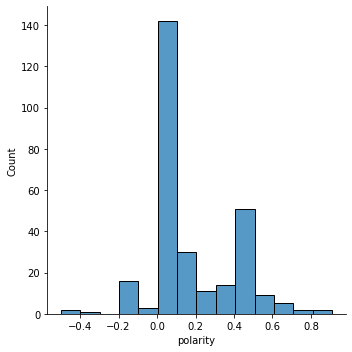

In [19]:
sns.displot(no_neutral['polarity'], kde=False);

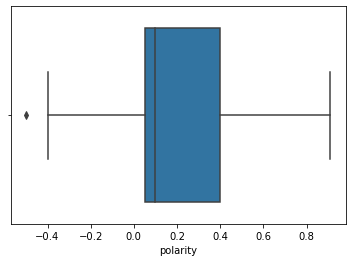

In [21]:
sns.boxplot(x=no_neutral['polarity']);

In [22]:
no_neutral

,texts_Infonavit,polarity
1,this year infonavit has delivered a thousand c...,0.100
2,this year infonavit has delivered a thousand c...,0.100
4,we address the housing backwardness product of...,0.500
5,this year infonavit has delivered a thousand c...,0.100
6,this year infonavit has delivered a thousand c...,0.100
...,...,...
492,patmercadoc senator with the use of technology...,-0.125
493,today we present the advances in housing and t...,0.050
494,president conference during government perform...,0.100
496,today we present the advances in housing and t...,0.050


In [23]:
no_neutral[no_neutral['polarity'] > 0.75]['texts_Infonavit']

28     meyerfalcon sedatumx conavimx fovissstemx info...
157    incredibly another abandoned project infonavit...
264    imagentvmex infonavit carlosmartinezv with a g...
Name: texts_Infonavit, dtype: object

In [24]:
no_neutral[no_neutral['polarity'] < -0.25]['texts_Infonavit']

38     vicenteserrano lopezobrador infonavit ehhhh st...
307    carlosmartinezv infonavit meyerfalcon davidrce...
313    we continue to work with operations of infonav...
Name: texts_Infonavit, dtype: object

In [25]:
grouped_by_title

0      conference president the director of the infon...
1      this year infonavit has delivered a thousand c...
2      this year infonavit has delivered a thousand c...
3      at the morning conference the secretary meyerf...
4      we address the housing backwardness product of...
                             ...                        
496    today we present the advances in housing and t...
497    at the moment meyerfalcon carlosmartinezv arqa...
498    today we will report on the progress of the ho...
499    infonavit carlosmartinezv governedomx if i wer...
500    good thursday amlos morning is now dedicated t...
Name: texts_Infonavit, Length: 501, dtype: object

In [26]:
grouped_by_title.to_csv("tweets_Infonavit-clean.csv")